<a href="https://colab.research.google.com/github/namzezz/IBM-MENTAL_HEALTH_FITNESS_TRACKER_NAMYA/blob/main/MentalHealthFitnessTracker_NamyaIBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IBM-MENTAL HEALTH FITNESS TRACKER**

## Importing the libraries

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Importing the dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

ds1 = pd.read_csv('/content/drive/MyDrive/DF/mental-and-substance-use-as-share-of-disease -AI.csv')
ds2 = pd.read_csv('/content/drive/MyDrive/DF/prevalence-by-mental-and-substance-use-disorder _AI.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ds1.head()

In [ ]:
ds2.head()

In [ ]:
ds=pd.merge(ds1,ds2)

ds.isnull().sum()
ds.head()


In [ ]:
ds.drop('Code',axis=1,inplace=True)
ds.isnull().sum()

In [ ]:
ds.set_axis(['Country','Year','mental_fitness','Schizophrenia','Bipolar_disorder','Eating_disorder','Anxiety','drug_usage','depression','alcohol',],axis='columns',inplace=True)

In [ ]:
ds.head()

#**DATA VISUALIZATION**

<Axes: >

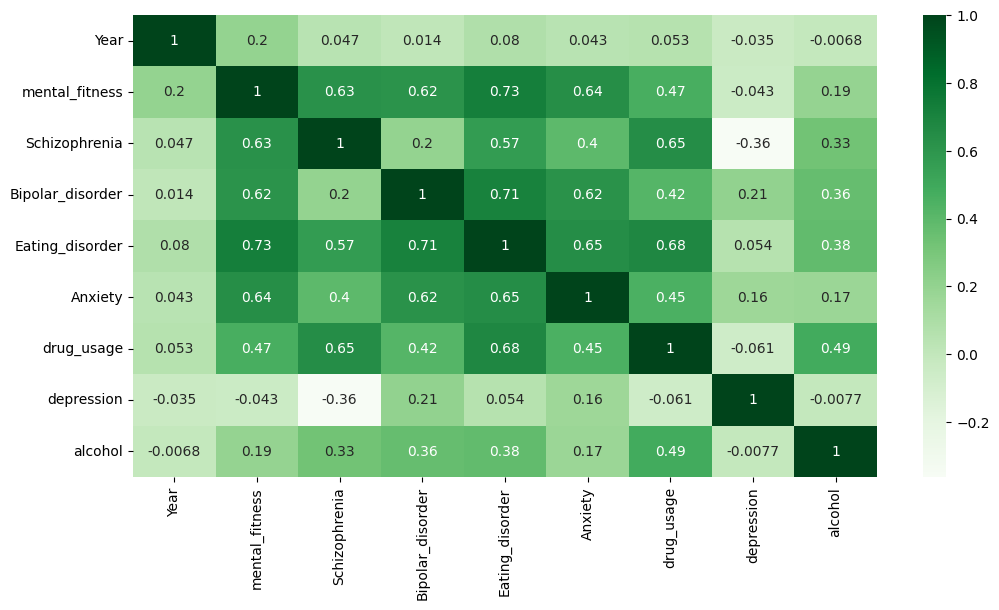

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(ds.corr(),annot=True,cmap="Greens")

In [ ]:
fig=px.pie(ds,values='mental_fitness',names='Year')
fig.show()


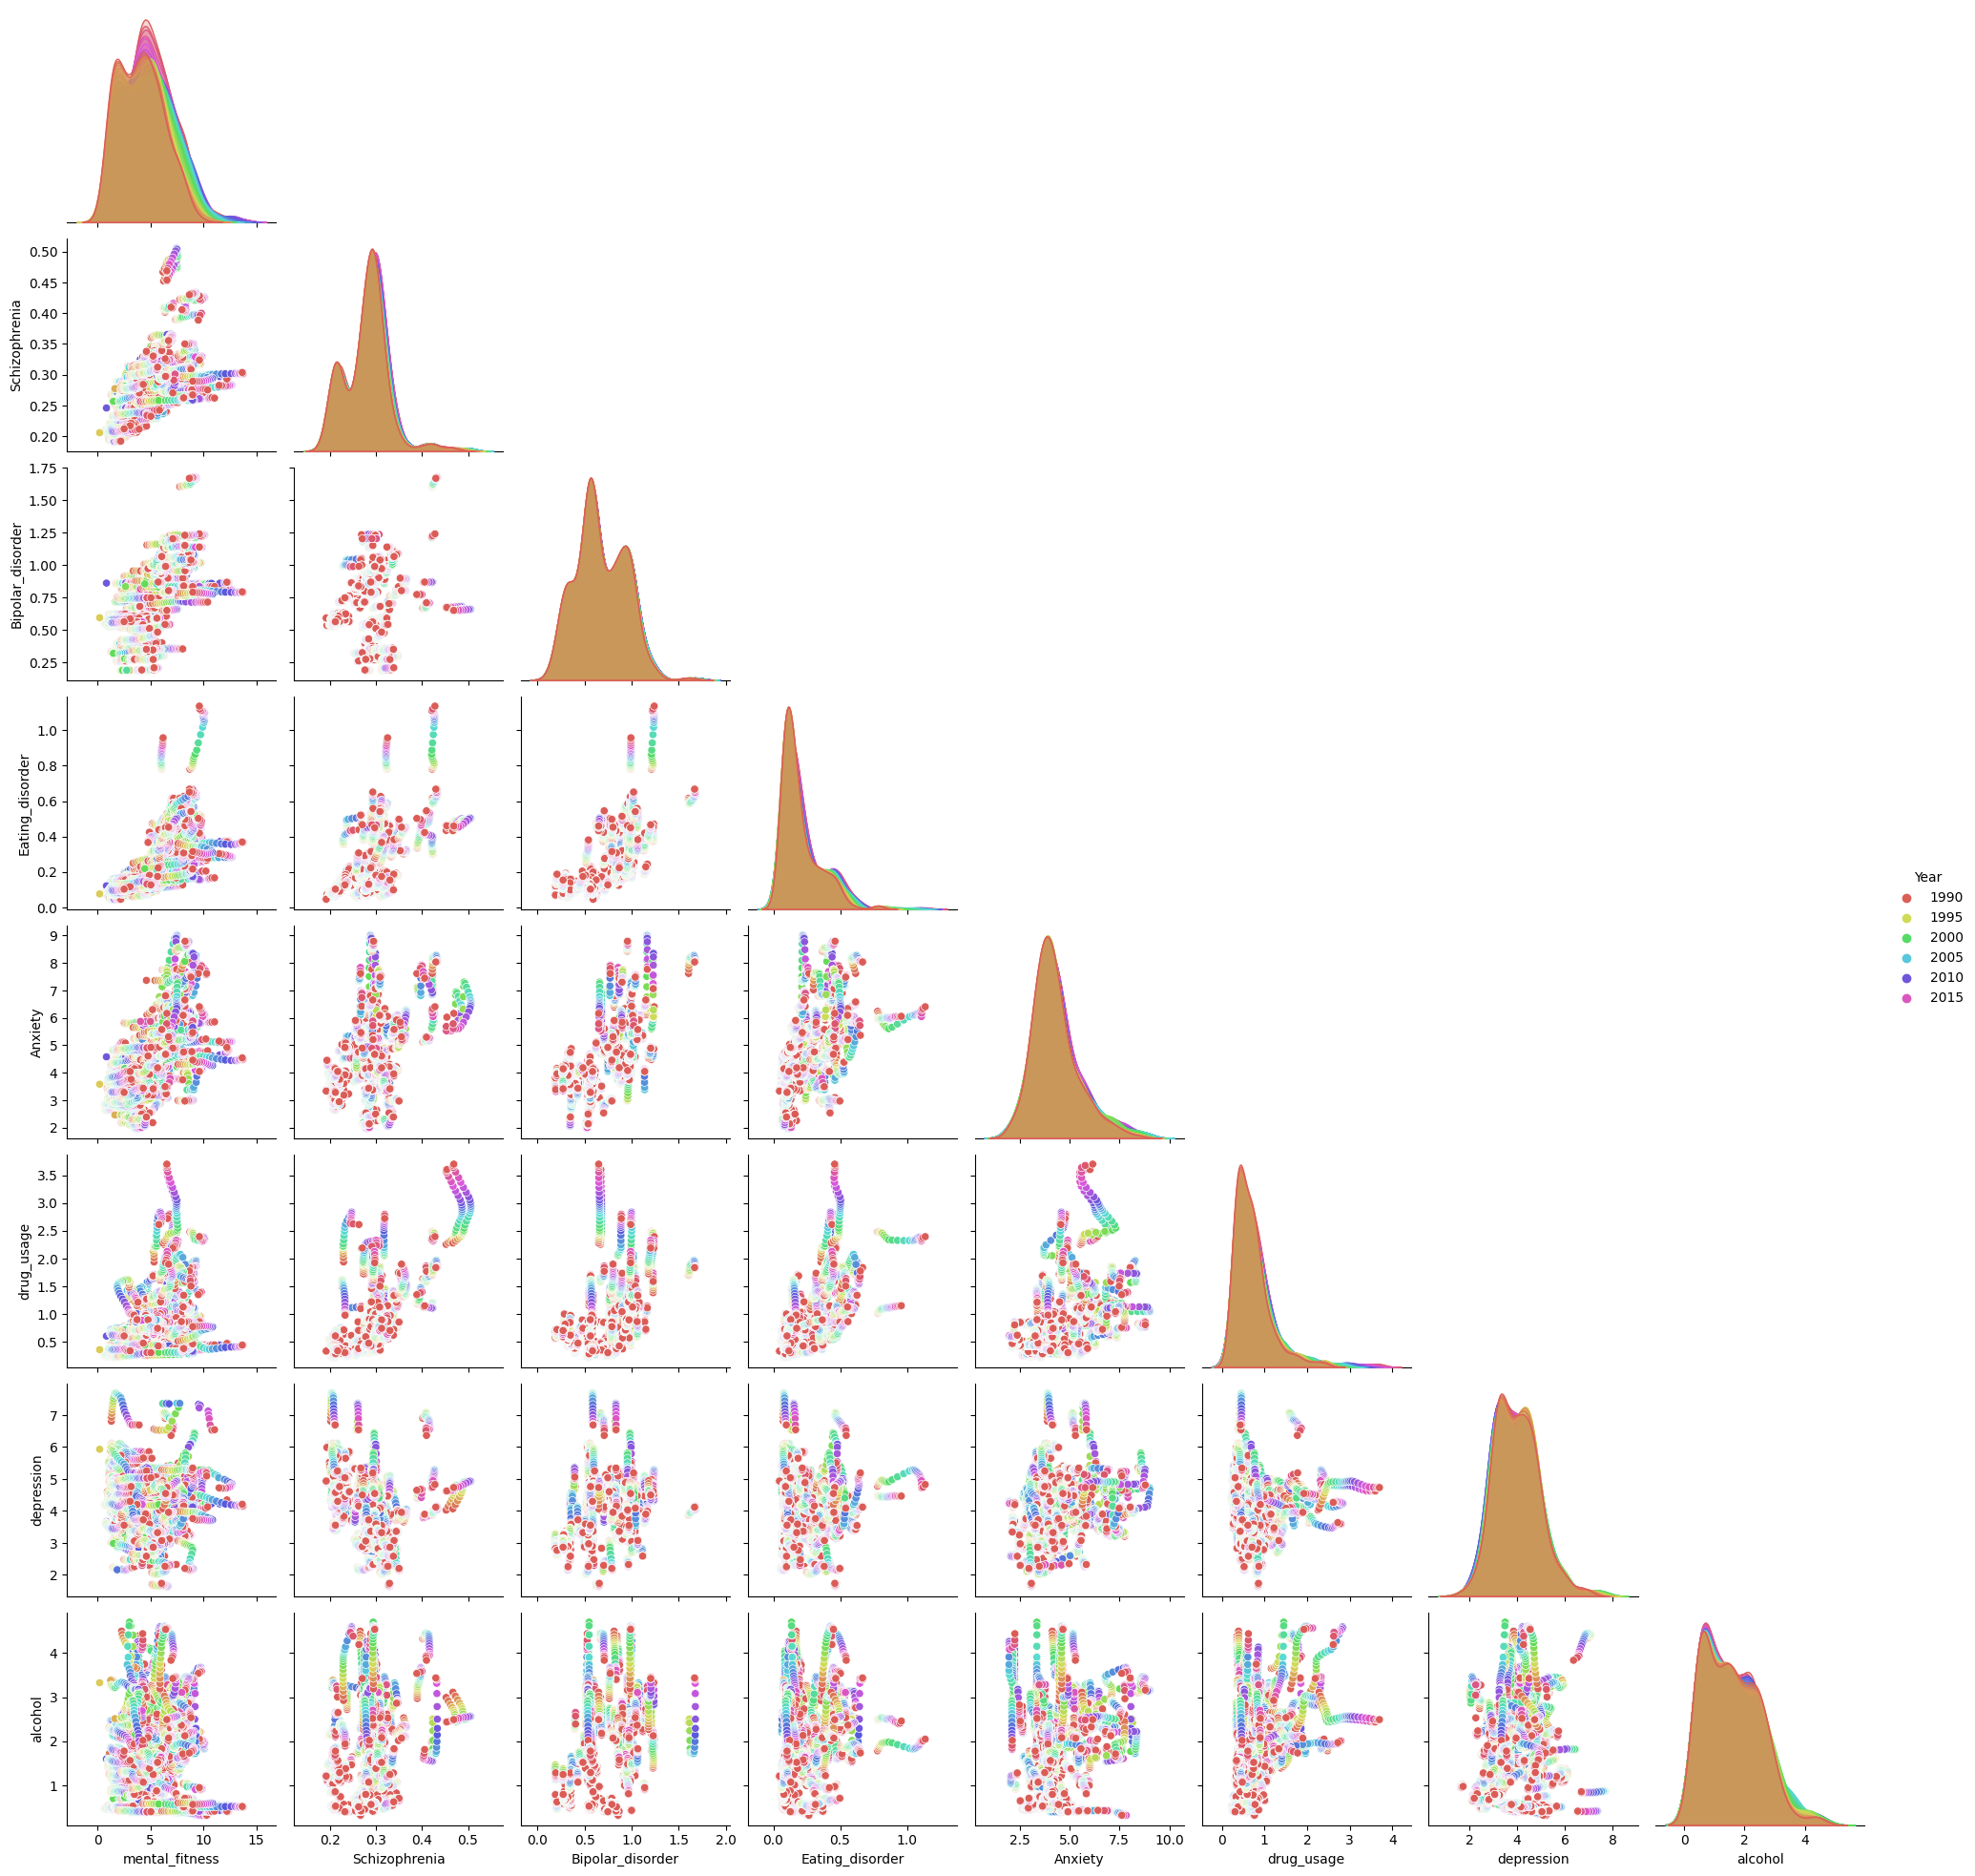

In [ ]:

sns.pairplot(ds,corner=True,hue='Year', palette='hls')
plt.show()

# **Data Preprocessing**

In [3]:
mean=ds['mental_fitness'].mean()
mean

NameError: ignored

In [4]:
data=ds

NameError: ignored

In [ ]:
data.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=l.fit_transform(data[i])

In [ ]:
data.shape

In [ ]:
x=data.drop('mental_fitness',axis=1)
y=data['mental_fitness']

In [ ]:
# df.drop(['Entity','Code','Year'],axis=1,inplace=True)
# ds.fillna(ds.mean())
x=ds[['Country',
      'Year',
    'Schizophrenia',
       'Bipolar_disorder',
       'Eating_disorder',
       'Anxiety',
       'drug_usage',
       'depression',
      'alcohol',
      ]].to_numpy()

y=ds[['mental_fitness']].to_numpy()
# x=ds.drop('mental_fitness',axis=1).to_numpy()
# y=ds['mental_fitness'].to_numpy()

## Splitting the dataset into the Training set and Test set

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#**REGRESSION MODEL SELECTION**


#**MULTIPLE LINEAR REGRESSION**

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = ml.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##Visualizing the **data**

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The multiple linear regression model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

#**POLYNOMIAL REGRESSION**

## Training the Polynomial Regression model on the Training set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
pr = LinearRegression()
pr.fit(x_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = pr.predict(poly_reg.transform(x_test))
np.set_printoptions(precision=5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5.0842  4.76057]
 [3.1624  2.73486]
 [4.12986 4.40571]
 ...
 [4.58837 4.78585]
 [1.37899 1.35131]
 [6.96573 7.05867]]


##Visualizing the **data**



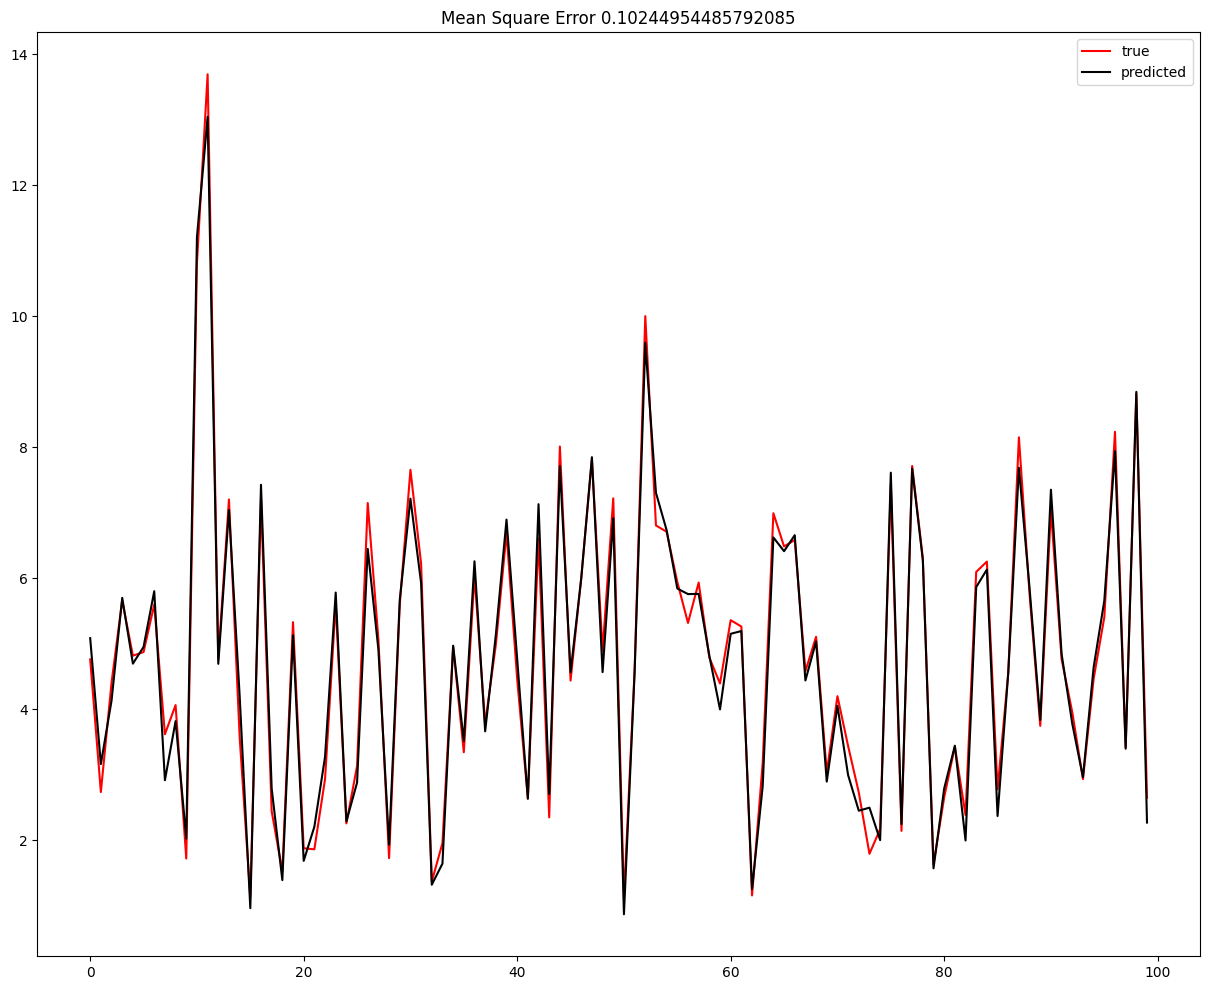

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The polynomial regression model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The polynomial regression model performance for training set
--------------------------------------------------------
Mean Square Error: 0.10244954485792085
Root Mean Square Error: 0.32007740447885547
R2: 0.9800930685025993


#**DECISION TREE REGRESSION**

## Training the Decision Tree Regression model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = dt.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.13  4.76]
 [ 0.24  2.73]
 [ 0.24  4.41]
 ...
 [-0.13  4.79]
 [ 0.4   1.35]
 [ 2.14  7.06]]


##Visualizing the **data**



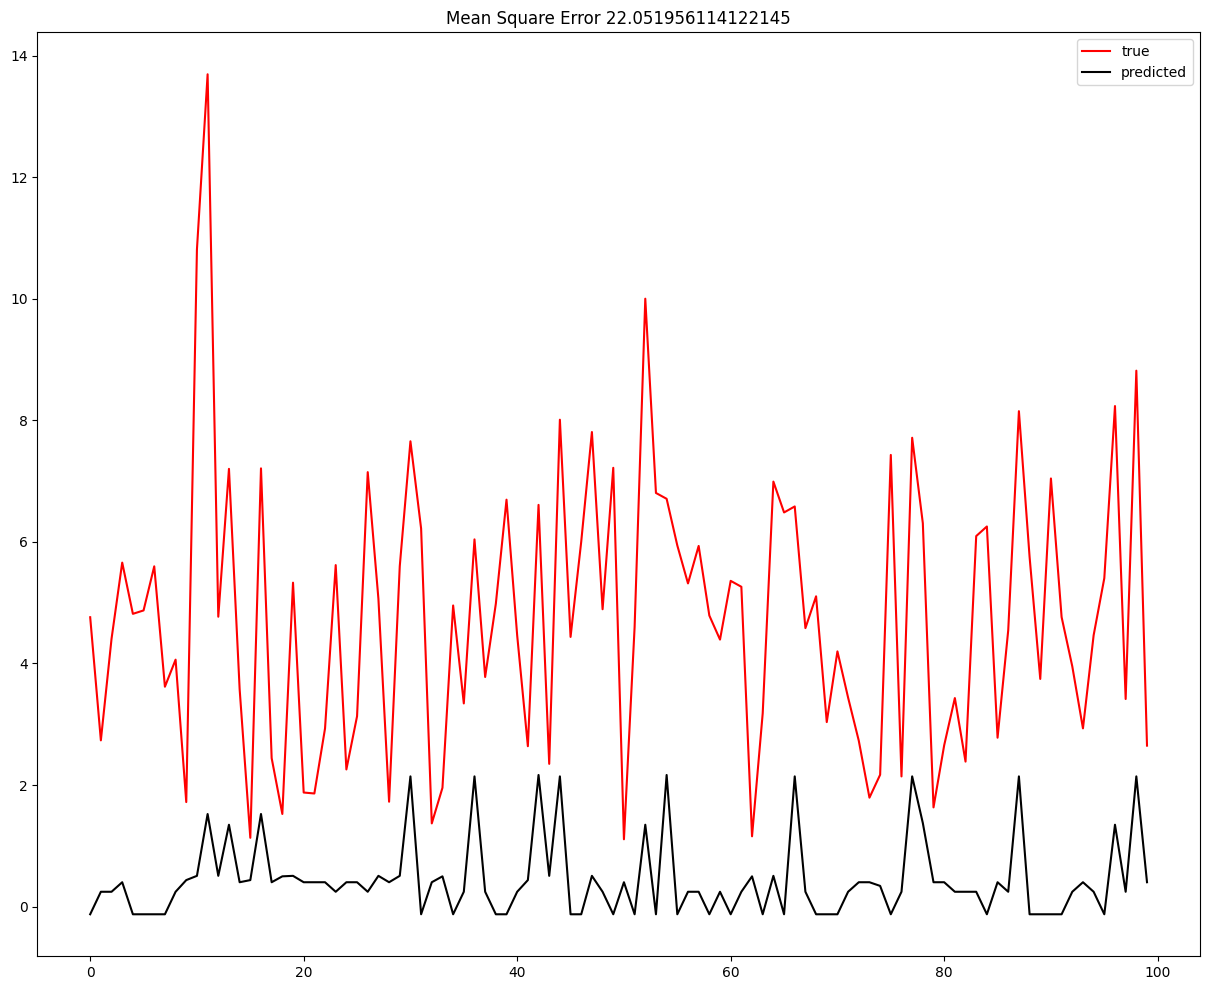

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The Decision Tree model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The Decision Tree model performance for training set
--------------------------------------------------------
Mean Square Error: 22.051956114122145
Root Mean Square Error: 4.695951034042214
R2: -3.2849070765157062


#**SUPPORT VECTOR REGRESSION**

## Feature Scaling

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined the SVR model 'svr', 'sc_x', and 'sc_y'

# Reshape y_train to a 2D array

sc_x = StandardScaler()
sc_y = StandardScaler()
# Fit the StandardScaler on your training data x_train and y_train
# sc_x.fit(x_train)
# sc_y.fit(y_train)

# Transform your training data using the fitted StandardScaler
x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train)



NameError: ignored

## Training the SVR model on the Training set


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = sc_y.inverse_transform(svr.predict(sc_x.transform(x_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

##Visualizing the **data**



In [ ]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100])
plt.plot(y_pred[:100])
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The SVR model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

#**RANDOM FOREST REGRESSION**

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
scaler=StandardScaler()
x=scaler.fit_transform(x)
rf=RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [ ]:
y_pred =rf.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.13 4.76]
 [0.78 2.73]
 [0.91 4.41]
 ...
 [1.01 4.79]
 [0.88 1.35]
 [1.89 7.06]]


##Visualizing the **data**



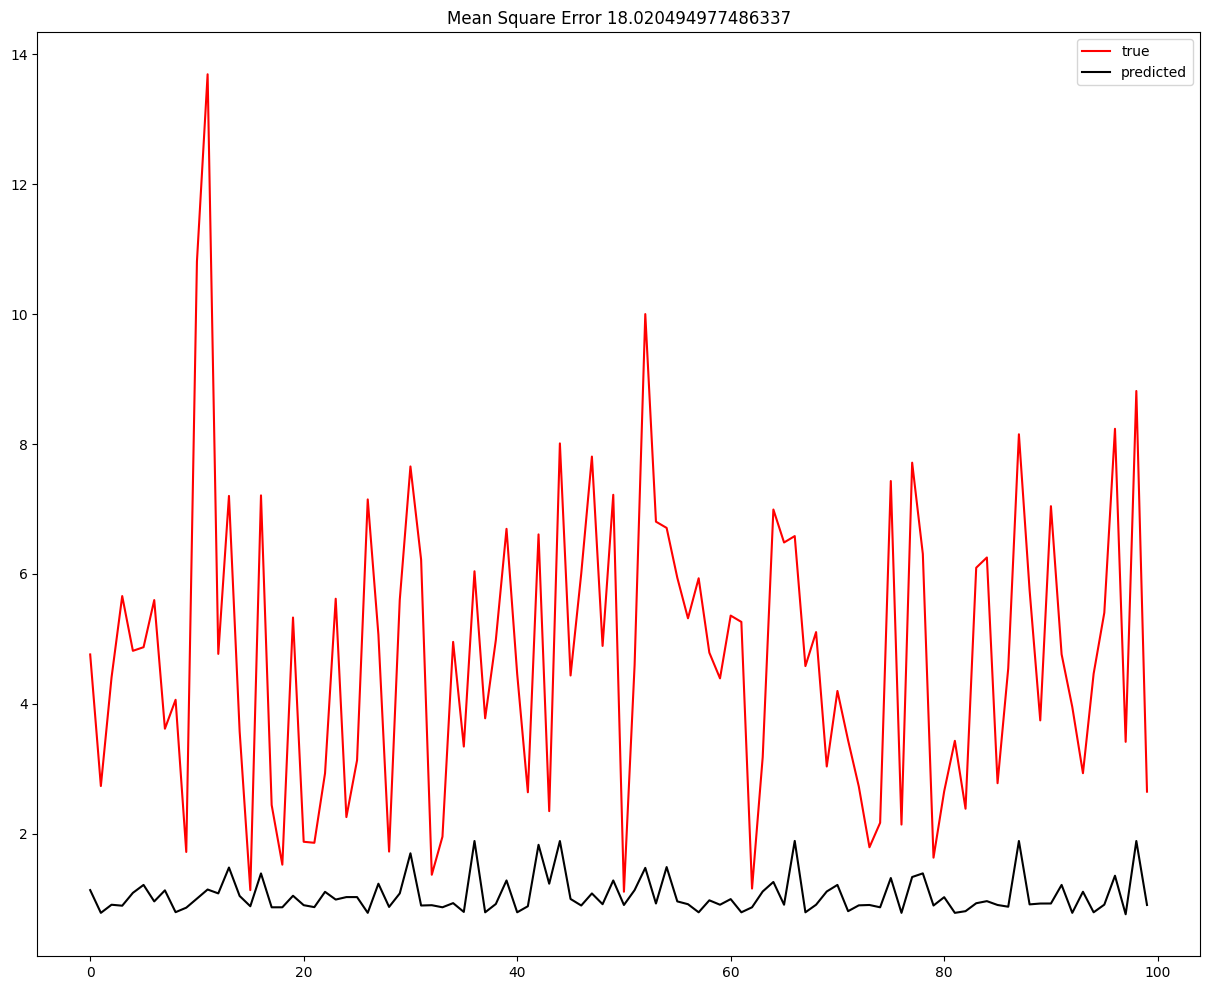

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100], color = 'red')
plt.plot(y_pred[:100], color='black')
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,y_pred)))
plt.show()

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print("The Random Forest Regression model performance for training set")
print("--------------------------------------------------------")
print('Mean Square Error: {}'.format(mse))
print('Root Mean Square Error: {}'.format(rmse))
print('R2: {}'.format(r2))

The Random Forest Regression model performance for training set
--------------------------------------------------------
Mean Square Error: 18.020494977486337
Root Mean Square Error: 4.245055356233454
R2: -2.5015554199247414


# We observe that RANDOM FOREST REGRESSION model performs well on both training and testing data hence we will use it for prediction

In [ ]:
import numpy as np

np.random.seed(range(0,100))
print("Welcome to Mental fitness Tracker!\nFill your details to check your mental fitness!")
country=l.fit_transform([input("Enter your country name:")])
year=int(input("Enter the year:"))
schi=(float(input("Enter your schizopherenia rate in %(IF NO enter 0 ):")))*100
bipo_dis=(float(input("Enter your bipolar disorder rate in %( IF NO enter 0 ):")))*100
eat_dis=(float(input("Enter your Eating disorder rate in %( IF NO enter 0 ):")))*100
anx=(float(input("Enter your Anxiety rate in %( IF NO enter 0 ):")))*100
drug_use=(float(input("Enter your drug usage rate in %( IF NO enter 0 ):")))*100
depr=(float(input("Enter your depression rate in %( IF NO enter 0)")))*100
alch=(float(input("Enter your alchol consuming rate per year in %(IF NO enter 0)")))*100

prediction = dt.predict([[country,year,schi,bipo_dis,eat_dis,anx,drug_use,depr,alch]])
prediction_value = prediction[0]*100
print("Your Mental Fitness is {}% ".format(prediction))
print("\nThank you!")

Welcome to Mental fitness Tracker!
Fill your details to check your mental fitness!
Enter your country name:INDIA
Enter the year:1900
Enter your schizopherenia rate in %(IF NO enter 0 ):1
Enter your bipolar disorder rate in %( IF NO enter 0 ):1
Enter your Eating disorder rate in %( IF NO enter 0 ):0
Enter your Anxiety rate in %( IF NO enter 0 ):10
Enter your drug usage rate in %( IF NO enter 0 ):0
Enter your depression rate in %( IF NO enter 0)12
Enter your alchol consuming rate per year in %(IF NO enter 0)05
Your Mental Fitness is [1.35]% 

Thank you!
